# <center> <font color='green'>GRIP :THE SPARKs FOUNDATION</font></center>

# <center> <font color='green'>Data Science and Business Analytics Intern</font></center>

# <center> <font color='green'>Author: ABHISHEK RAUNIYAR</font></center>

# <center> <font color='green'>Task (1) :STUDENT MARKS PREDICTION</font></center>
In this task we have to precict the percentage score of a student based on the number of hours studied.Basically the task have two variables where the features is the no.of hours studied and the target value is the percentage score. So,here I solved this by Linear regression.

<center><img src='https://www.parentingforbrain.com/wp-content/uploads/motivate-teenager.jpg'></center>

### Table Content
1. [Importing Libarires](#import)

2. [Reading Data Set](#read)
3. [Visualization](#visu)
4. [Data-Preparation](#data)
5. [Training The Algorithm](#train)
6. [Visualizing The Model](#vis2)
7. [Making Prediction](#pre)
8. [What would be the predicated score if a student studies for 9.25 hours/day?](#score)
9. [Checking The Assumption Of Linear Regression](#ass)
10. [Model Evaluation](#evl)

# STEP:1 Importing Libraries<a class='anchor' id='import'></a>

In [1]:
# for handling warnings
import warnings
warnings.filterwarnings('ignore')

## standard libarires
import numpy as np
import pandas as pd

##for visualization
import seaborn as sng
import matplotlib.pyplot as plt

# STEP:2 Reading Data Set<a class='anchor' id='read'></a>

In [2]:
## Read the data set
data=pd.read_csv("marks.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
### to find the no of rows and column of data set
print('Shape of the data-set is:',data.shape)

Shape of the data-set is: (25, 2)


In [4]:
# To find  the information of data-set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [5]:
# Checking the null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### In given data set there is no null value

# STEP:3 Visualization<a class='anchor' id='visu'></a>

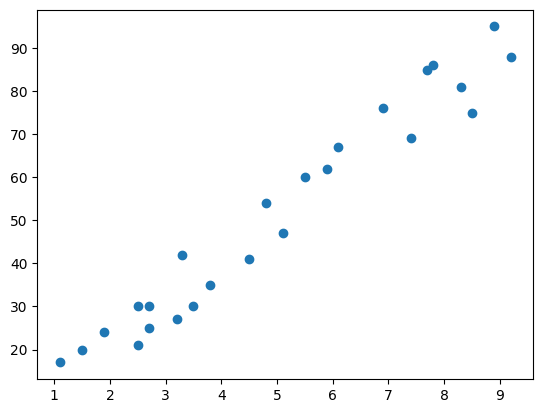

In [6]:
plt.scatter(data["Hours"],data["Scores"])

 From the above graph we can observe that there is a linear relation between "Hours/day" and score. So we can use the linear regression supervised machine model on it predictt futher values.

In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


so the both the variables are positively correlated to each other

# STEP:4 Data-Preparation<a class='anchor' id='data'></a>

HERE WE WILL GOING TO SPLIT THE WHOLE DATA INTO TWO PARTS-TESTING DATA AND TRAINING DATA. SO ,USING iloc function we will divide the data

In [8]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [10]:
## check the size of traning-input data
print(x_train.size)

20


In [11]:
## check the size of test-input data
print(x_test.size)

5


In [12]:
## check the size of traning-output data
print(y_train.shape)

(20,)


In [13]:
## check the size of test-output data
print(y_test.shape)

(5,)


# STEP:5 Training The Algorithm<a class='anchor' id='train'></a>

WE HAVE SPITTED THE DATA INTO TRAINING AND TESTING SETS,NOW WE WILL TRAIN OUR MODEL

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# STEP:6 Visualizing The Model<a class='anchor' id='vis2'></a>

AFTER TRAINING THE MODEL,NOW IT'S TIME TO VISUALIZE IT.

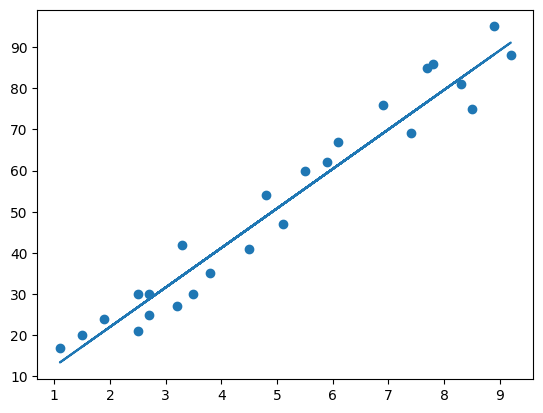

In [15]:
plt.scatter(data["Hours"],data["Scores"])
y_value=lr.coef_*x+lr.intercept_
plt.plot(x,y_value)

# STEP:7 Making Prediction<a class='anchor' id='pre'></a>

In [16]:
pred=lr.predict(x_test)


In [17]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':pred})
actual_predicted

,Target,Predicted
15,95,88.211394
20,30,28.718453
23,76,69.020122
22,35,39.273652
14,17,13.365436


# STEP:8 What would be the predicated score if a student studies for 9.25 hours/day?<a class='anchor' id='score'></a>

In [18]:
### intercept made by line
lr.intercept_

2.810236462826552

In [19]:
### slope of the line
lr.coef_

array([9.59563563])

In [20]:
h=9.25
a=lr.coef_*h+lr.intercept_
print("If a student studies for {} hours per day he /she will score {}% in exam.".format(h,a))

If a student studies for 9.25 hours per day he /she will score [91.56986604]% in exam.


# STEP:9 Checking the assumption of linear regression<a class='anchor' id='ass'></a>

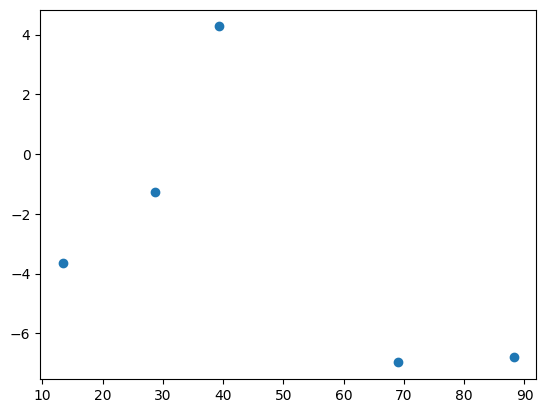

In [21]:
plt.scatter(pred,pred-y_test)

Here we get random plot between predicted value and error which satisfy  assumption of linear Regression.

<Axes: xlabel='Scores', ylabel='Density'>

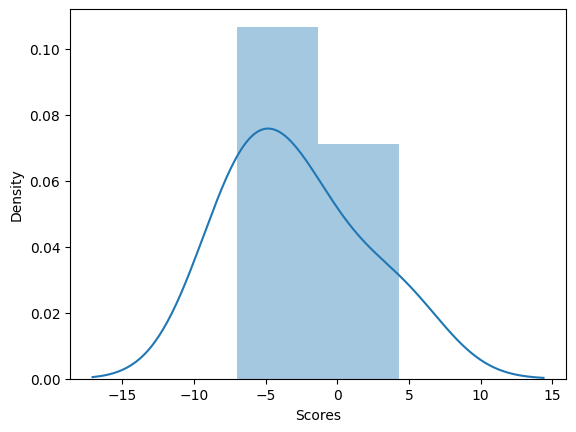

In [22]:
sng.distplot(pred-y_test)

Here we get nearly normal distribution curve of error which satisfy assumption of linear Regression.

# STEP:10 Model Evaluation<a class='anchor' id='evl'></a>

In [23]:
### Evaluate mean absolute error
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y_test,pred)
print('MEAN ABSOLUTE ERROR :-',error)

### Evaluate squared error
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


### Evaluate r2_score
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN ABSOLUTE ERROR :- 4.5916495300630285
MEAN SQUARED ERROR :- 25.584078296539932
R2_SCORE :- 0.971014141329942
